In [238]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [239]:
df=pd.read_csv(r'C:\Users\thaddad\Desktop\data.csv')
df.dropna(inplace=True)

df.head()

,Unnamed: 0,Header_ID,Amount,Payment_Date,TrnType,CustID,Invoice_Date,Invoice_Num,PreTaxAmt,Cust_Name,City,Prov,Terms,Purch_YTD,Purch_LastY,Due_Date,Status1,Status
0,0,75777,-282.24,2019-10-22,1,584,2019-10-22,64125,252.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2019-12-03,-42.0,1
1,1,70761,-264.32,2018-05-17,1,584,2018-05-17,59950,236.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2018-06-28,-42.0,1
2,2,60350,198.24,2016-01-21,1,584,2015-11-27,50655,-177.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2016-01-08,13.0,0
3,3,60148,-344.96,2016-01-21,1,584,2015-11-16,50480,308.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2015-12-28,24.0,0
4,4,56890,-259.84,2015-03-25,1,584,2015-02-02,47697,232.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2015-03-16,9.0,0


In [240]:
df.loc[df['Status1'] <=0, 'Status']=1
df.loc[(df['Status1'] >= 1), 'Status'] = 0
#df.loc[(df['Status1'] >= 31) & (df['Status1'] <= 60), 'Status'] = 2
#df.loc[(df['Status1'] >= 61), 'Status'] = 3

df.head()

,Unnamed: 0,Header_ID,Amount,Payment_Date,TrnType,CustID,Invoice_Date,Invoice_Num,PreTaxAmt,Cust_Name,City,Prov,Terms,Purch_YTD,Purch_LastY,Due_Date,Status1,Status
0,0,75777,-282.24,2019-10-22,1,584,2019-10-22,64125,252.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2019-12-03,-42.0,1
1,1,70761,-264.32,2018-05-17,1,584,2018-05-17,59950,236.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2018-06-28,-42.0,1
2,2,60350,198.24,2016-01-21,1,584,2015-11-27,50655,-177.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2016-01-08,13.0,0
3,3,60148,-344.96,2016-01-21,1,584,2015-11-16,50480,308.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2015-12-28,24.0,0
4,4,56890,-259.84,2015-03-25,1,584,2015-02-02,47697,232.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2015-03-16,9.0,0


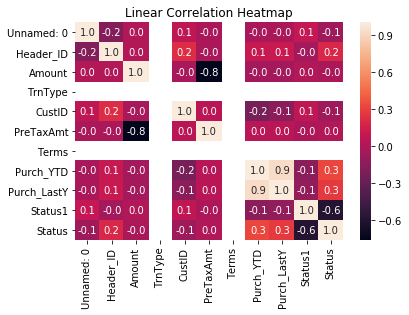

In [241]:
sns.heatmap(df.corr(),annot=True,fmt=".1f")
plt.title('Linear Correlation Heatmap')
plt.show()

In [242]:
Feature=df[['Purch_YTD','Purch_LastY']]
X=Feature
X[:5]

,Purch_YTD,Purch_LastY
0,282.24,0.0
1,282.24,0.0
2,282.24,0.0
3,282.24,0.0
4,282.24,0.0


In [243]:
y = df['Status'].values
y

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [244]:
df.Status.unique()

array([1, 0], dtype=int64)

In [245]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-0.98, -1.5 ],
       [-0.98, -1.5 ],
       [-0.98, -1.5 ],
       ...,
       [-0.95, -1.5 ],
       [-0.95, -1.5 ],
       [-0.95, -1.5 ]])

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

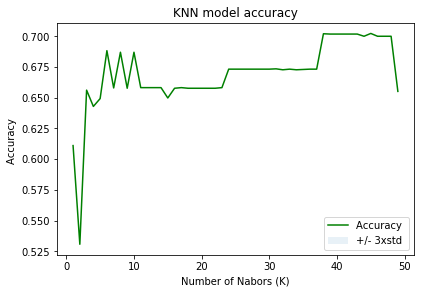

The best accuracy was with 0.7023718439173681 with k= 45


In [247]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks,1):
    #Train Model and Predict  
    clf = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    clf_pred=clf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, clf_pred)
    
#Plot model accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.title('KNN model accuracy')
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [248]:
knn = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1,weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=45, p=2,
           weights='uniform')

In [249]:
knn_pred=knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.60      0.77      0.68      1575
           1       0.81      0.65      0.72      2346

   micro avg       0.70      0.70      0.70      3921
   macro avg       0.71      0.71      0.70      3921
weighted avg       0.73      0.70      0.71      3921

Confusion matrix, without normalization


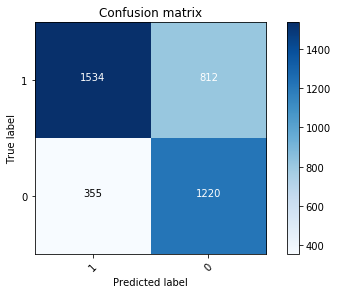

In [250]:
#confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, knn_pred, labels=df.Status.unique())
np.set_printoptions(precision=2)

print (classification_report(y_test, knn_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=df.Status.unique(),normalize= False,  title='Confusion matrix')

In [251]:
from sklearn.metrics import f1_score

f1_score(knn_pred, y_test,average='micro')

print("F1 Score: ",f1_score(knn_pred, y_test,average='micro'))

F1 Score:  0.7023718439173681


In [252]:
df.head(1)

,Unnamed: 0,Header_ID,Amount,Payment_Date,TrnType,CustID,Invoice_Date,Invoice_Num,PreTaxAmt,Cust_Name,City,Prov,Terms,Purch_YTD,Purch_LastY,Due_Date,Status1,Status
0,0,75777,-282.24,2019-10-22,1,584,2019-10-22,64125,252.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2019-12-03,-42.0,1


In [253]:
proba=knn.predict_proba(df[['Purch_YTD','Purch_LastY']])
df['proba_late_%']=round(proba[0][0]*100,0)
df['proba_early_%']=round(proba[0][1]*100,0)
df['Coll_within_terms']=df['PreTaxAmt']*df['proba_early_%']/100
df['Coll_beyond_terms']=df['PreTaxAmt']*df['proba_late_%']/100

In [254]:
df.head()

,Unnamed: 0,Header_ID,Amount,Payment_Date,TrnType,CustID,Invoice_Date,Invoice_Num,PreTaxAmt,Cust_Name,City,Prov,Terms,Purch_YTD,Purch_LastY,Due_Date,Status1,Status,proba_late_%,proba_early_%,Coll_within_terms,Coll_beyond_terms
0,0,75777,-282.24,2019-10-22,1,584,2019-10-22,64125,252.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2019-12-03,-42.0,1,9.0,91.0,229.32,22.68
1,1,70761,-264.32,2018-05-17,1,584,2018-05-17,59950,236.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2018-06-28,-42.0,1,9.0,91.0,214.76,21.24
2,2,60350,198.24,2016-01-21,1,584,2015-11-27,50655,-177.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2016-01-08,13.0,0,9.0,91.0,-161.07,-15.93
3,3,60148,-344.96,2016-01-21,1,584,2015-11-16,50480,308.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2015-12-28,24.0,0,9.0,91.0,280.28,27.72
4,4,56890,-259.84,2015-03-25,1,584,2015-02-02,47697,232.0,Pacific Breeze Heating & Cooling Inc.,Abbotsford,BC,30,282.24,0.0,2015-03-16,9.0,0,9.0,91.0,211.12,20.88


In [255]:
n=5

df[['Cust_Name','Invoice_Num','Invoice_Date','PreTaxAmt','proba_late_%','Coll_beyond_terms','proba_early_%','Coll_within_terms']].head(n)

,Cust_Name,Invoice_Num,Invoice_Date,PreTaxAmt,proba_late_%,Coll_beyond_terms,proba_early_%,Coll_within_terms
0,Pacific Breeze Heating & Cooling Inc.,64125,2019-10-22,252.0,9.0,22.68,91.0,229.32
1,Pacific Breeze Heating & Cooling Inc.,59950,2018-05-17,236.0,9.0,21.24,91.0,214.76
2,Pacific Breeze Heating & Cooling Inc.,50655,2015-11-27,-177.0,9.0,-15.93,91.0,-161.07
3,Pacific Breeze Heating & Cooling Inc.,50480,2015-11-16,308.0,9.0,27.72,91.0,280.28
4,Pacific Breeze Heating & Cooling Inc.,47697,2015-02-02,232.0,9.0,20.88,91.0,211.12


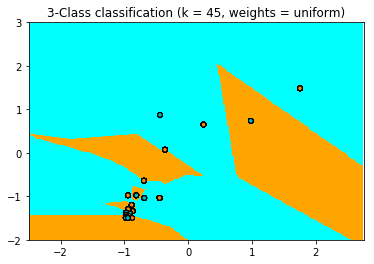

In [256]:
#visualize classification

X=X[:,:2]
y = y

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# # we only take the first two features. We could avoid this ugly
# # slicing by using a two-dim dataset

h = .02  # step size in the mesh

# # Create color maps
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['darkorange', 'c'])

#for weights in ['uniform', 'distance']:
# we create an instance of Neighbours Classifier and fit the data.
#clf = neighbors.KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1, weights='uniform')

clf=knn
clf.fit(X,y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.min()-1, X.max()+1
y_min, y_max = y.min()-2, y.max()+2
    
   
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title("3-Class classification (k = %i, weights = %s)" % (mean_acc.argmax()+1, 'uniform'))

plt.show()
